# Consumo de APIs y fuentes de datos
En esta última guía de la materia vamos a ver cómo obtener datos de fuentes externas.

Desde ya hemos trabajado con archivos .csv provenientes del repositorio oficial de la materia en Github, pero nunca consultamos datos que se encuentren en otros sitios.

## Kaggle


Antes de ver cómo consumir APIs, te recomendamos el sitio https://www.kaggle.com/, en el cual vas a poder descargar archivos csv de diversas investigaciones. Para poder utilizarlos, basta con que los subas a un repositorio propio de Github, y listo! Ya podrás accederlo mediante la URL que se genera con el botón "Raw"

### Obteniendo un dataset de Kaggle
Supongamos que me interesa realizar una investigación sobre los valores alimenticios de Mcdonalds (por dar una idea).
Buscando dentro de Kaggle encontramos este dataset https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts

Descargamos el dataset, lo subimos a Github y luego ya lo podemos usar!
Nosotros ya hicimos el trabajo y lo publicamos...

In [1]:
import pandas as pd
mcdonalds_menu = pd.read_csv("https://raw.githubusercontent.com/informaticaort/intro-datascience/main/datasets/India_Menu.csv")

In [2]:
mcdonalds_menu.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


Recordá que es super importante que el enlace que pongas en los paréntesis del read_csv sea el del archivo raw de Github. 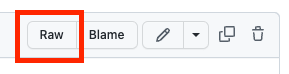

## Obteniendo datos a través de sitios gubernamentales
El gobierno de la Ciudad de Buenos Aires y el gobierno nacional de Argentina permiten el acceso a varios sets de datos.
Te dejamos los enlaces acá:

https://data.buenosaires.gob.ar/dataset/

http://datos.gob.ar/

## Obteniendo datos de una API
Para hacerlo sencillo, una API es un servicio que proporciona una empresa con el objetivo de poder utilizar sus datos o funcionalidades. Amazon tiene su API, Google Translate tiene su API, Binance tiene su API, Spotify tiene su API... 

Algunas APIs son de acceso gratuito, otras de pago. Esto es importante a tener en cuenta cuando queramos realizar nuestra investigación. 

### PokeApi

Veamos un ejemplo con la API de Pokemon A.K.A PokeApi.

In [3]:
import requests


In [4]:
response = requests.get('https://pokeapi.co/api/v2/pokemon?limit=1200')

data = response.json()
pokemons = pd.DataFrame(data['results'])
pokemons

,name,url
0,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/
1,ivysaur,https://pokeapi.co/api/v2/pokemon/2/
2,venusaur,https://pokeapi.co/api/v2/pokemon/3/
3,charmander,https://pokeapi.co/api/v2/pokemon/4/
4,charmeleon,https://pokeapi.co/api/v2/pokemon/5/
...,...,...
1149,dialga-origin,https://pokeapi.co/api/v2/pokemon/10245/
1150,palkia-origin,https://pokeapi.co/api/v2/pokemon/10246/
1151,basculin-white-striped,https://pokeapi.co/api/v2/pokemon/10247/
1152,basculegion-female,https://pokeapi.co/api/v2/pokemon/10248/


Así conseguimos el listado de todos los pokemons existentes en la PokeApi.
¿Qué hicimos?
* Importamos una librería requests
* La usamos llamando a la función get, pasandole la URL de la API que queremos consultar. 
* Obtenemos la data de la respuesta, que debemos convertir a formato [JSON](https://www.json.org/json-es.html). 
* Creamos un dataframe con la data que vino de la respuesta y lo guardamos en una variable llamada pokemons



### REST Countries
Este sitio (https://restcountries.com/#rest-countries) provee una API para obtener datos de países. 

In [5]:
countries = pd.read_json("https://restcountries.com/v3.1/all")
countries

,name,tld,cca2,ccn3,cca3,cioc,independent,status,unMember,currencies,...,fifa,car,timezones,continents,flags,coatOfArms,startOfWeek,capitalInfo,postalCode,gini
0,"{'common': 'Kuwait', 'official': 'State of Kuw...",[.kw],KW,414.0,KWT,KUW,1.0,officially-assigned,True,"{'KWD': {'name': 'Kuwaiti dinar', 'symbol': 'د...",...,KUW,"{'signs': ['KWT'], 'side': 'right'}",[UTC+03:00],[Asia],"{'png': 'https://flagcdn.com/w320/kw.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,sunday,"{'latlng': [29.37, 47.97]}","{'format': '#####', 'regex': '^(\d{5})$'}",NaN
1,"{'common': 'Palau', 'official': 'Republic of P...",[.pw],PW,585.0,PLW,PLW,1.0,officially-assigned,True,"{'USD': {'name': 'United States dollar', 'symb...",...,NaN,"{'signs': ['PAL'], 'side': 'right'}",[UTC+09:00],[Oceania],"{'png': 'https://flagcdn.com/w320/pw.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [7.5, 134.62]}","{'format': '96940', 'regex': '^(96940)$'}",NaN
2,"{'common': 'Liechtenstein', 'official': 'Princ...",[.li],LI,438.0,LIE,LIE,1.0,officially-assigned,True,"{'CHF': {'name': 'Swiss franc', 'symbol': 'Fr'}}",...,LIE,"{'signs': ['FL'], 'side': 'right'}",[UTC+01:00],[Europe],"{'png': 'https://flagcdn.com/w320/li.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [47.13, 9.52]}","{'format': '####', 'regex': '^(\d{4})$'}",NaN
3,"{'common': 'Moldova', 'official': 'Republic of...",[.md],MD,498.0,MDA,MDA,1.0,officially-assigned,True,"{'MDL': {'name': 'Moldovan leu', 'symbol': 'L'}}",...,MDA,"{'signs': ['MD'], 'side': 'right'}",[UTC+02:00],[Europe],"{'png': 'https://flagcdn.com/w320/md.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [47.01, 28.9]}","{'format': 'MD-####', 'regex': '^(?:MD)*(\d{4}...",{'2018': 25.7}
4,"{'common': 'Angola', 'official': 'Republic of ...",[.ao],AO,24.0,AGO,ANG,1.0,officially-assigned,True,"{'AOA': {'name': 'Angolan kwanza', 'symbol': '...",...,ANG,"{'signs': ['ANG'], 'side': 'right'}",[UTC+01:00],[Africa],"{'png': 'https://flagcdn.com/w320/ao.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [-8.83, 13.22]}",NaN,{'2018': 51.3}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"{'common': 'Equatorial Guinea', 'official': 'R...",[.gq],GQ,226.0,GNQ,GEQ,1.0,officially-assigned,True,"{'XAF': {'name': 'Central African CFA franc', ...",...,EQG,"{'signs': ['GQ'], 'side': 'right'}",[UTC+01:00],[Africa],"{'png': 'https://flagcdn.com/w320/gq.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [3.75, 8.78]}",NaN,NaN
246,"{'common': 'Namibia', 'official': 'Republic of...",[.na],NA,516.0,NAM,NAM,1.0,officially-assigned,True,"{'NAD': {'name': 'Namibian dollar', 'symbol': ...",...,NAM,"{'signs': ['NAM'], 'side': 'left'}",[UTC+01:00],[Africa],"{'png': 'https://flagcdn.com/w320/na.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [-22.57, 17.08]}",NaN,{'2015': 59.1}
247,"{'common': 'Timor-Leste', 'official': 'Democra...",[.tl],TL,626.0,TLS,TLS,1.0,officially-assigned,True,"{'USD': {'name': 'United States dollar', 'symb...",...,TLS,"{'signs': ['TL'], 'side': 'left'}",[UTC+09:00],[Oceania],"{'png': 'https://flagcdn.com/w320/tl.png', 'sv...",{},monday,"{'latlng': [-8.58, 125.6]}",NaN,{'2014': 28.7}
248,"{'common': 'Brunei', 'official': 'Nation of Br...",[.bn],BN,96.0,BRN,BRU,1.0,officially-assigned,True,"{'BND': {'name': 'Brunei dollar', 'symbol': '$...",...,BRU,"{'signs': ['BRU'], 'side': 'left'}",[UTC+08:00],[Asia],"{'png': 'https://flagcdn.com/w320/bn.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [4.88, 114.93]}","{'format': '@@####', 'regex': '^([A-Z]{2}\d{4}...",NaN


Veamos a ver qué dice de Argentina...

In [6]:
countries[countries["cioc"]== "ARG"]

,name,tld,cca2,ccn3,cca3,cioc,independent,status,unMember,currencies,...,fifa,car,timezones,continents,flags,coatOfArms,startOfWeek,capitalInfo,postalCode,gini
62,"{'common': 'Argentina', 'official': 'Argentine...",[.ar],AR,32.0,ARG,ARG,1.0,officially-assigned,True,"{'ARS': {'name': 'Argentine peso', 'symbol': '...",...,ARG,"{'signs': ['RA'], 'side': 'right'}",[UTC-03:00],[South America],"{'png': 'https://flagcdn.com/w320/ar.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [-34.58, -58.67]}","{'format': '@####@@@', 'regex': '^([A-Z]\d{4}[...",{'2019': 42.9}


### RapidAPI
Te dejamos un sitio llamado RapidAPI que cuenta con una biblioteca bastante grande de APIs públicas y gratuitas que podés animarte a usar para tu investigación. 

https://rapidapi.com/collection/list-of-free-apis